## Avance 1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#pip install seaborn

In [3]:
df = pd.read_csv('Student Performance new.csv')
df.head()

,Unnamed: 0,Group,parental level of education,lunch,test preparation course,math percentage,reading score percentage,writing score percentage,sex
0,0,group B,bachelor's degree,standard,none,0.72,0.72,0.74,F
1,1,group C,some college,standard,completed,0.69,0.90,0.88,F
2,2,group B,master's degree,standard,none,0.90,0.95,0.93,F
3,3,group A,associate's degree,free/reduced,none,0.47,0.57,0.44,M
4,4,group C,some college,standard,none,0.76,0.78,0.75,M


In [12]:
#df.drop(['Unnamed: 0'],
        axis = 1, inplace = True
       )
df.head()


,Group,parental level of education,lunch,test preparation course,mathscore,readingscore,writing score,sex
0,group B,bachelor's degree,standard,none,0.72,0.72,0.74,F
1,group C,some college,standard,completed,0.69,0.90,0.88,F
2,group B,master's degree,standard,none,0.90,0.95,0.93,F
3,group A,associate's degree,free/reduced,none,0.47,0.57,0.44,M
4,group C,some college,standard,none,0.76,0.78,0.75,M


# Descripcion de las variables

* Group - Grupo asignado a los estudiantes
* Parental level of education - nivel educativo de los padres de los estudiantes
* lunch - 
* test preparation course - 
* math percentage - 
* reading score percentage - 
* writing score percentage - 
* sex –


## Pregunta de investigacion 1

### ¿Cuál es el promedio de calificación de los grupos en matemáticas según el sexo?

In [4]:
pivot = pd.pivot_table(df,
                       index = 'Group',
                       values = 'math percentage',
                        aggfunc = 'mean',
                        columns = ['sex'],
                      )
pivot

sex,F,M
Group,,
group A,0.585278,0.637358
group B,0.614038,0.659302
group C,0.620333,0.676115
group D,0.652481,0.694135
group E,0.708116,0.767465


## Conclusion
#### En conclusion el promedio de calificación de female y male en grupo A es de .585 y .637, el promedio de female y male en grupo B es de .614 y .659, en el grupo C el de female y male es de .620 y .676, el promedio de female y male en grupo D es de .652 y .694, y en el grupo E el promedio de female y male es de .708 y .767.

## Pregunta de investigacion 2
### La variable 'reading score percentage' tiene algun comportamiento de alguna distribucion?


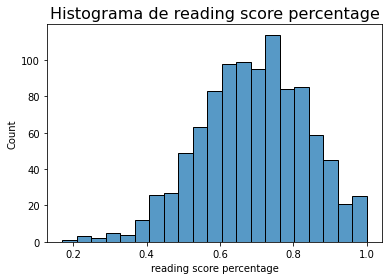

In [5]:
sns.histplot(df['reading score percentage'],
            ).set_title('Histograma de reading score percentage', fontsize= 16)
plt.show()

### Conclusion
#### En conclusion, la variable 'reading score percentage' parece tener una distribucion de tipo ...


## Pregunta de investigacion 3
### ¿Existen outliers en la variable "writing score percentage"?



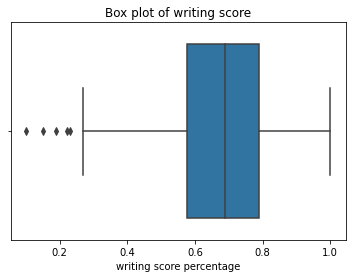

In [6]:
sns.boxplot(x = df['writing score percentage'],
           ).set_title('Box plot of writing score')
plt.show()

### Conclusion
#### Según el boxplot generado con los datos de la variable 'writing score percentage' si existen outliers en esta variable


### Pregunta de Investigacion 4



### Pregunta de Investigacion 5
#### ¿Cual es el impacto de la variable 'Group' en 'math percentage'?

In [7]:
import statsmodels.api as sm
import numpy as np
from sklearn import linear_model


In [8]:
#pip install statsmodels


In [9]:
#pip install sklearn

In [10]:
df.rename(columns = {'math percentage' : 'mathscore', 'reading score percentage': 'readingscore', 'writing score percentage': 'writing score'},
                     inplace = True)

df.columns


Index(['Unnamed: 0', 'Group', 'parental level of education', 'lunch',
       'test preparation course', 'mathscore', 'readingscore', 'writing score',
       'sex'],
      dtype='object')

In [11]:
y = df['mathscore']
x = df['Group']

modelA = sm.OLS.from_formula('mathscore ~ Group', data = df)
resultA = modelA.fit()
resultA.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              mathscore   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     14.59
Date:                Wed, 01 Dec 2021   Prob (F-statistic):           1.37e-11
Time:                        03:29:48   Log-Likelihood:                 496.37
No. Observations:                1000   AIC:                            -982.7
Df Residuals:                     995   BIC:                            -958.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.6163      0.016     39.373      0.000       0.586       0.647
Group[T.group B]     0.0182      0.019      0.961      0.337      -0.019       0.055
Group[T.group C]     0.0283      0.018      1.601      0.110      -0.006       0.063
Group[T.group D]     0.0573      0.018      3.165      0.002       0.022       0.093
Group[T.group E]     0.1219      0.020      6.090      0.000       0.083       0.161
==============================================================================
Omnibus:                       21.781   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.392
Skew:                          -0.326   Prob(JB):                     8.33e-06
Kurtosis:                       3.370   Cond. No.                         8.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Conclusion
#### En conclusion, la R-squared en el modelo es de .055, por lo que solo el 5.5% de la variable es explicado por el modelo, por lo que no tiene un impacto.
#### Modelo: 0.6163 + 0.0182*Group B + 0.0283*Group C + 0.0573*Group D + 0.1219*Group E
